In [1]:
import h5py

# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/mfunet-regularizedRMSE/mfunet-regularizedRMSE.h5', 'r')
# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/mfunet-grayscale-01/epoch_19/mfunet_rmse.h5', 'r')
# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/reg_mse_fix/reg_mse_fix_v3.h5', 'r')
# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/lagrangian/lcnn-bugfix_v2/lcnn-bugfix.h5', 'r')
# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/LUMIN/LUMIN-frozen.h5', 'r')
# f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/RainNet/RainNet-iterative.h5', 'r')
f = h5py.File('/data/softec-lagrangian-nowcasting/outputs/LUPIN-finetune/LUPIN-finetune.h5', 'r')

In [2]:
from datamodules import SHMUDataModule
from pathlib import Path
from utils.config import load_config

confpath = Path("") / "configs/MFUNET_train_conf"
dsconf = load_config(confpath / "datasets.yaml")
modelconf = load_config(confpath / "MFUNET.yaml")

dsconf.SHMUDataset.transform_to_grayscale = True

datamodule = SHMUDataModule(dsconf, modelconf.train_params)
datamodule.setup("test")
dataset = datamodule.test_dataset

/opt/anacondas/anaconda3/envs/nowcasting/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pysteps configuration file found at: /opt/anacondas/anaconda3/envs/nowcasting/lib/python3.10/site-packages/pysteps/pystepsrc



In [8]:
import numpy as np

arr = np.zeros((12, 336, 336))
y_arr = np.zeros((6, 336, 336))

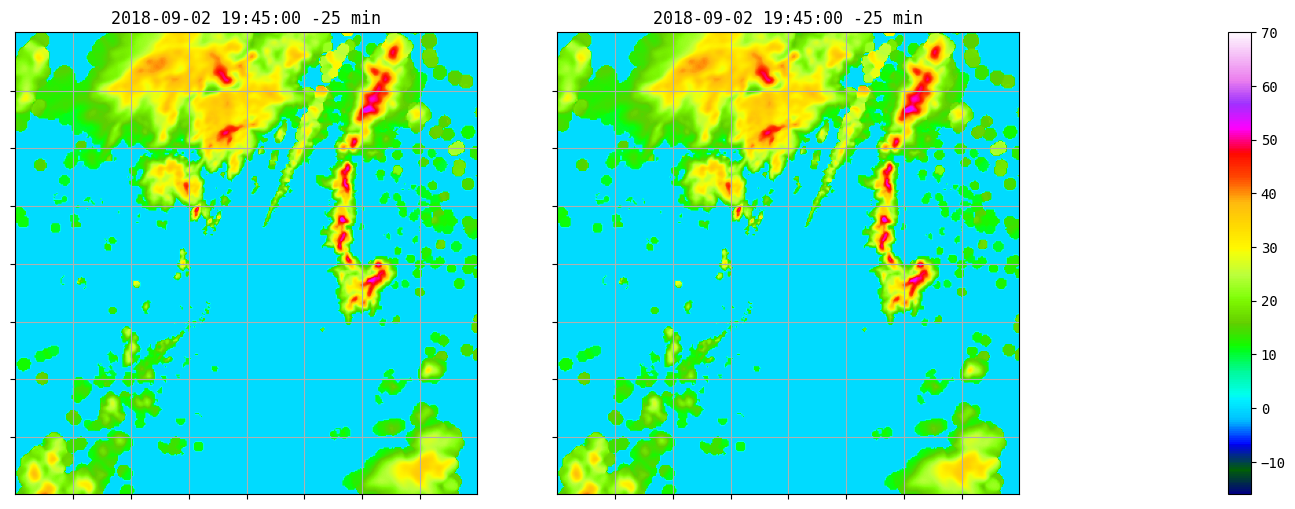

In [85]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animate
from IPython.display import HTML

plt.rcParams["font.family"] = "monospace"

sample_idx = random.randrange(len(dataset))
sample_idx = 35
sample_key = dataset.get_common_time(sample_idx).strftime("%Y-%m-%d %H:%M:%S")

x, y, idx = dataset[sample_idx]

for i in range(0, 6):
    arr[i] = dataset.from_grayscale(np.array(x[i][0]))
    arr[i][arr[i] < 10] = 0

for i in range(0, 6):
    arr[i+6] = np.array(f[sample_key]['model'][f'{i+1}']['data'])
    arr[i+6][arr[i+6] < 64] = 64
    arr[i+6] = arr[i+6] / 2 - 32
    arr[i+6][arr[i+6] < 10] = 0 # L-CNN fix

for i in range(0, 6):
    y_arr[i] = dataset.from_grayscale(np.array(y[i][0]))
    y_arr[i][y_arr[i] < 10] = 0

fig, axes = plt.subplots(1, 3, width_ratios=[3,3,1], figsize=(16,6))

im = axes[1].imshow(arr[0], cmap='gist_ncar', vmin=-16, vmax=70)
axes[2].axis('off')
cbar = plt.colorbar(im, ax=axes[2])

def update(frame):
    axes[0].imshow(arr[frame], cmap='gist_ncar', vmin=-16, vmax=70)
    # axes[0].axis('off')
    axes[0].xaxis.set_ticks(np.array([1, 2, 3, 4, 5, 6, 7]) * 42)
    axes[0].yaxis.set_ticks(np.array([1, 2, 3, 4, 5, 6, 7]) * 42)
    axes[0].xaxis.set_ticklabels([])
    axes[0].yaxis.set_ticklabels([])
    axes[0].set_title(f"{sample_key}{(frame-5)*5:+4d} min")
    axes[0].grid(True)

    axes[1].imshow(arr[frame], cmap='gist_ncar', vmin=-16, vmax=70)
    # axes[1].axis('off')
    axes[1].xaxis.set_ticks(np.array([1, 2, 3, 4, 5, 6, 7]) * 42)
    axes[1].yaxis.set_ticks(np.array([1, 2, 3, 4, 5, 6, 7]) * 42)
    axes[1].xaxis.set_ticklabels([])
    axes[1].yaxis.set_ticklabels([])
    if frame >= 6:
        axes[1].imshow(y_arr[frame-6], cmap='gist_ncar', vmin=-16, vmax=70)
    axes[1].set_title(f"{sample_key}{(frame-5)*5:+4d} min")
    axes[1].grid(True)
    # plt.show()

ani = animate.FuncAnimation(fig=fig, func=update, frames=12)
HTML(ani.to_jshtml())

In [82]:
[1, 2, 3, 4, 5, 6, 7] * 42

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,


In [245]:
f[sample_key].keys()

<KeysViewHDF5 ['mfunet-regularizedRMSE']>

In [ ]:
for i in range(len(arr)):
    plt.imshow(arr[i], cmap='gist_ncar', vmin=-16, vmax=70)
    plt.axis('off')
    cbar = plt.colorbar()
    plt.title(f"{sample_key}{(i-5)*5:+4d} min")
    plt.show()